Ce notebook renvoie à la partie 0.2.1 

**Distribution des données**

### Partie 1 : Représenter la répartition des données

On commence par compter le **nombre de témoins pour chaque œuvre**, en regroupant **prose et poésie**.  
Ensuite, il s'agit de **déterminer combien d'œuvres possèdent un même nombre de témoins**.

On visualise ensuite cette distribution à l’aide d’un **graphique en échelle logarithmique**, où :

- **l’axe des abscisses** correspond au **nombre de témoins par œuvre** ;
- **l’axe des ordonnées** indique le **nombre d’œuvres ayant ce nombre de témoins**.


In [1]:
# Importation des bibliothèques nécessaires

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os


I. Création d'une Série Pandas qui associe à chaque nombre de témoins le nombre d’œuvres ayant ce nombre précis de témoins.


In [2]:
#On récupère nos fichiers de travail
folder_path = r"C:\Users\Guidi\Desktop\Ecole_Chartes\Memoire\code_copia"
files = ["prose.xlsx", "poetry_new.xlsx"]

# Liste pour stocker les DataFrames 
dfs = []

for file in files:
    df = pd.read_excel(os.path.join(folder_path, file))
    dfs.append(df)

# On concatène les deux DataFrames (prose et poésie) 
df_combined = pd.concat(dfs, ignore_index=True)

# On compte le nombre de témoins par œuvre sur le corpus qui a été combiné
counts_combined = df_combined['workTitle'].value_counts()

# On affiche un aperçu du nombre de témoins par oeuvre pour voir si le code fonctionne
print("Aperçu du nombre de témoins par oeuvre :")
print(counts_combined.head())
print("\n")

Aperçu du nombre de témoins par oeuvre :
corpus_prudentii                                                                                                                                                 283
Evangeliorum libri IV                                                                                                                                             77
Historarium adversum paganos libri VII                                                                                                                            71
Libellus in modum symboli                                                                                                                                         59
Epistula ad Palchonium episcopium Bracarensem de reliquiis s. Stephani, una cum versione latina Luciani epistulae de inuentione corporis s. Stephani martyris     55
Name: workTitle, dtype: int64




In [3]:
#Ensuite on réunit les oeuvres qui ont le même nombre de témoins

works_per_num_witnesses = counts_combined.value_counts().sort_index()
print(works_per_num_witnesses)

1      19
2       5
3       2
4       1
5       2
6       7
7       5
8       1
9       1
10      1
12      1
13      2
15      1
16      2
19      1
21      1
25      2
28      1
29      1
30      1
31      1
37      1
38      1
41      1
52      1
55      1
59      1
71      1
77      1
283     1
Name: workTitle, dtype: int64


II. Description du graphique

Le graphique montre la répartition des œuvres selon leur nombre de témoins :

- Axe x : nombre de témoins par œuvre  
- Axe y : nombre d’œuvres correspondant  
- Taille des points proportionnelle au nombre de témoins  
- Ligne de tendance reliant les points  
- Échelles logarithmiques sur les deux axes pour mieux visualiser la distribution


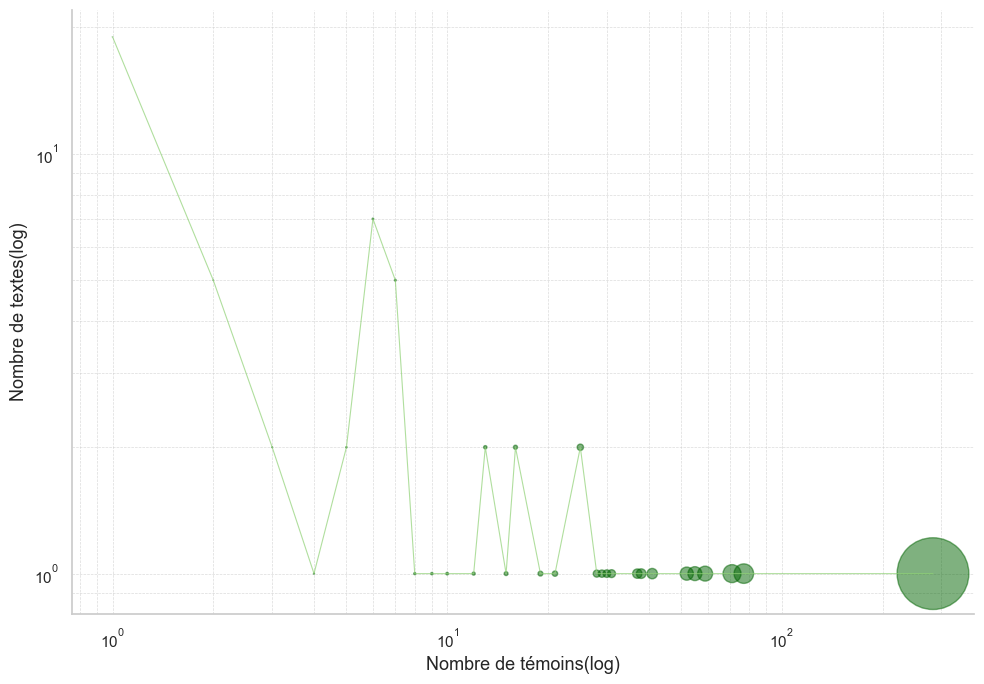

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

# Création d'un DataFrame pour le nuage de points : x = nombre de témoins, y = nombre d'œuvres
x = works_per_num_witnesses.index
y = works_per_num_witnesses.values
sizes = (x ** 2) / 30 # Normalisation de la taille des points


df = pd.DataFrame({
    'Nombre de témoins par œuvre': x,
    'Nombre d\'œuvres': y,
    'Aire': sizes
}).sort_values(by='Nombre de témoins par œuvre')

# Utilisation de Seaborn pour rendre le graphique plus esthétique
sns.set_theme(style="whitegrid")

# Création de la "zone de dessin" pour notre graphique
plt.figure(figsize=(10, 7))

# On rajoute une ligne de tendance entre les points
plt.plot(df['Nombre de témoins par œuvre'], df['Nombre d\'œuvres'], 
         linestyle='-', linewidth=0.8, color='#8fd175', alpha=0.7)

# On règle la couleur et l'esthétique du nuage de points 
plt.scatter(df['Nombre de témoins par œuvre'], df['Nombre d\'œuvres'],
            s=df['Aire'], color='#006400', alpha=0.5)

#On supprime les axes du haut et de droite pour rendre le graphique plus lisible
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

# On met les axes en échelle logarithmique pour mieux visualiser la distribution
plt.xscale('log')
plt.yscale('log')

# Dernières touches esthétiques et visualisation du graphique
plt.xlabel("Nombre de témoins(log)", fontsize=13)
plt.ylabel("Nombre de textes(log)", fontsize=13)
plt.grid(True, which="both", linestyle='--', linewidth=0.5, alpha=0.7)
plt.ylim(bottom=0.8 * df['Nombre d\'œuvres'].min())  # On a ajouté une marge en bas afin que l'aire du point représentant le corpus de Prudence (plus de 200 oeuvres) n'empiète pas sur l'axe des abscisses
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)
plt.tight_layout()
plt.show()


### Partie 2 : Identifier la loi statistique suivie par nos données

Pour commencer, on ajuste une loi de puissance aux données de fréquence (nombre de témoins). Ensuite, on compare cette loi à d’autres distributions (lognormale, exponentielle) afin de déterminer celle qui décrit le mieux nos données. Enfin, on visualise la distribution empirique et ses ajustements pour définir quelle loi s'ajuste le mieux à nos données.



In [5]:
import powerlaw #librairie Python qui permet de faire des analyses sur les distributions à queue lourde
#documentation utilisée : https://pythonhosted.org/powerlaw/


In [7]:
import powerlaw
import matplotlib.pyplot as plt

# On extrait les fréquences (ce qui correspond au nombre de témoins) 
data = counts_combined.values

# On ajuste une loi de puissance, en précisant que nos données sont discrètes
fit = powerlaw.Fit(data, discrete=True, xmin=1)

print(f"Exposant estimé (=alpha) : {fit.alpha:.3f}") ##il vaut mieux afficher alpha pour savoir si la loi de puissance est bien ajustée

#  On compare avec plusieurs autres lois pour voir si la loi de puissance est la plus adaptée ou pas 
distributions = ['lognormal', 'exponential']

for dist in distributions:
    R, p = fit.distribution_compare('power_law', dist)
    print(f"Comparaison power law vs {dist} : R = {R:.3f}, p = {p:.3f}")







Exposant estimé (=alpha) : 1.407
Comparaison power law vs lognormal : R = -8.251, p = 0.008
Comparaison power law vs exponential : R = 14.710, p = 0.303


Se rapproche plus d'une loi à queue lourde mais coprus avec trop peu de données pour réellement conclure sur loi de puissanceou loi lognormale cf p-value et R.
Plus précis=autres familles qui ont même comportement que loi puissance avec mêmes caractéristiques de queues lourdes et log normale un poil plus précis que loi puissance mais incertitude dûe à nos données.

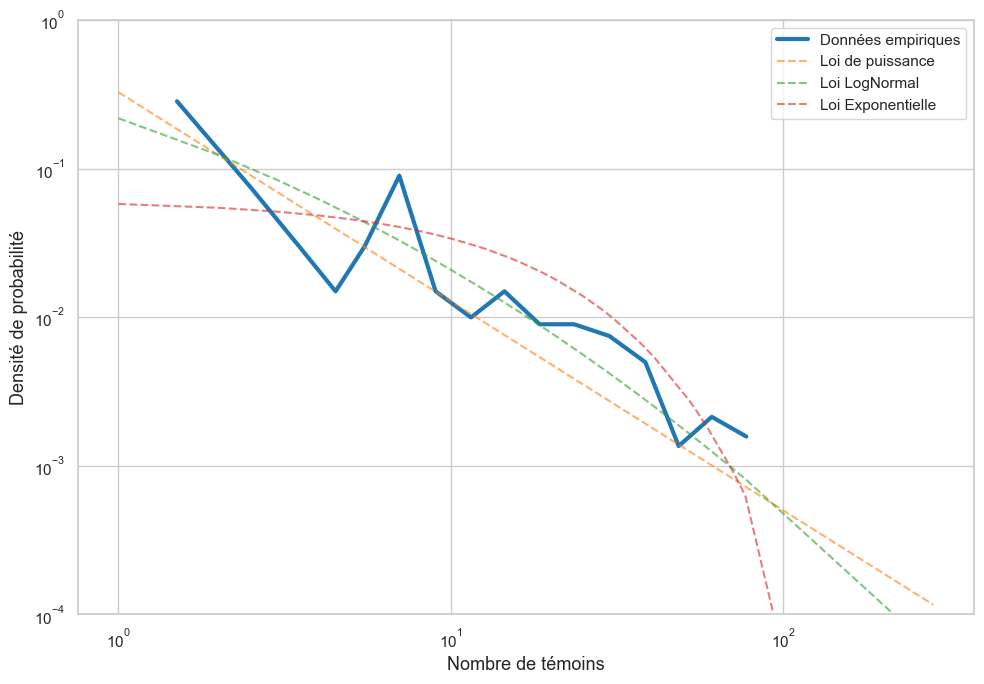

In [8]:
# Quelques ajustements esthétiques pour le graphique final (définition du style et des couleurs)
sns.set_theme(style="whitegrid")
color_data = sns.color_palette("tab10")[0]       
color_powerlaw = sns.color_palette("tab10")[1]  
color_lognormal = sns.color_palette("tab10")[2] 
color_exponential = sns.color_palette("tab10")[3]

plt.figure(figsize=(10, 7))

# On ajuste la distribution empirique avec une couleur pleine
ax = fit.plot_pdf(color=color_data, label='Données empiriques', linewidth=3)

# On trace les lois ajustées avec des couleurs transparentes 
fit.power_law.plot_pdf(color=color_powerlaw, linestyle='--', alpha=0.6, label='Loi de puissance', ax=ax)
fit.lognormal.plot_pdf(color=color_lognormal, linestyle='--', alpha=0.6, label='Loi LogNormal', ax=ax)
fit.exponential.plot_pdf(color=color_exponential, linestyle='--', alpha=0.6, label='Loi Exponentielle', ax=ax)

# On définit les axes et les limites du graphique
plt.ylim(1e-4, 1e0)
plt.xlabel("Nombre de témoins", fontsize=13)
plt.ylabel("Densité de probabilité", fontsize=13)
plt.legend( fontsize=11, title_fontsize=12)
plt.tight_layout()
plt.show()